<a href="https://colab.research.google.com/github/velasoka-repo/EVA4/blob/master/Session-11/EVA4_S11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Github Link](https://github.com/velasoka-repo/EVA4/tree/master/Session-11)

# Google Drive Mount

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

#add working directory into syspath
EVA4_PATH = "/content/gdrive/My Drive/Colab Notebooks/EVA4/Session-11"
import sys
if not EVA4_PATH in sys.path:
  sys.path.append(EVA4_PATH)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Install Missing python Modules

In [0]:
pip install torch-lr-finder

# Python Module Import & device

In [2]:
import utils.data as data
import utils.augment as aug
import utils.transform as tf
import model.nn as nn
import utils.torch_util as util
import utils.runner as network
import utils.visualize as view
import velasoka as vel

  pip install torch-lr-finder -v --global-option="amp"


In [0]:
import torch
import numpy as np
from torch.optim.lr_scheduler import OneCycleLR

# Cyclic Triangle Plot

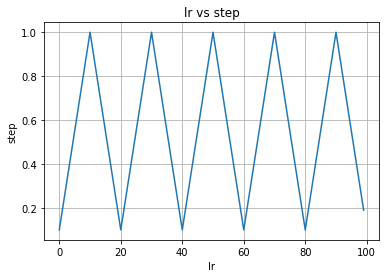

In [3]:
view.show_curve()

# Dataloader

In [81]:
torch.cuda.manual_seed(6)
torch.manual_seed(6)

train_loader, train_aug_loader, test_loader = vel.cifar10(batch_size=512)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


# Model

In [82]:
device = util.device()
print(f"Available Device: {device}")
optimizer = util.optimizer()
loss_fns = util.loss()

Available Device: cuda


In [0]:
torch.cuda.manual_seed(6)

model = nn.ResNet(block=nn.ResBlock).to(device)
sgd_optimizer = optimizer.SGD(params=model.parameters(), lr=0.02, momentum=0.9, weight_decay=1e-3)
cross_entropy = loss_fns.CrossEntropyLoss()

# LR Range
* Min LR: **0.02009**
* Max LR: **1.00999**


Learning rate search finished. See the graph with {finder_name}.plot()


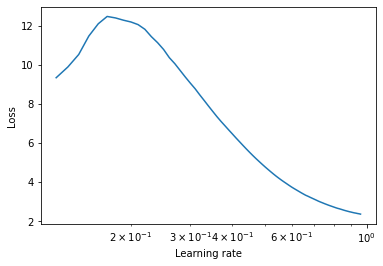

In [26]:
lr_finder = util.lr_finder(model=model, optimizer=sgd_optimizer, criterion=cross_entropy, device=device)
lr_finder.range_test(train_loader=train_loader, start_lr=1e-7, end_lr=1., num_iter=100, step_mode="linear")
lr_finder.plot()

#### LR Range Result

In [58]:
lr_history = np.array(lr_finder.history['lr'])
loss_history = np.array(lr_finder.history['loss'])
MAX_LR = np.max(lr_history)
MIN_LR = np.min(lr_history)
print(f"Min LR: {MIN_LR}, Max LR: {MAX_LR}")
loss_min = np.argmin(loss_history)
print(f"As per minimum LOSS, Max LR: {lr_history[loss_min]}")
lr, loss = lr_finder.history['lr'], lr_finder.history['loss']

# LR Comparison with respect to LOSS
# for i in range(len(lr_history)):
#   print(f"LR: {lr_history[i]:.4f}, LOSS: {loss_history[i]:.4f}")

Min LR: 0.020000098, Max LR: 1.0099999990000001
As per minimum LOSS, Max LR: 1.0099999990000001


# Pytorch OneCycleLR

In [0]:
one_cycle_policy = OneCycleLR(sgd_optimizer, max_lr=0.6, pct_start=0.21 , steps_per_epoch=len(train_loader), div_factor=10, cycle_momentum=False, epochs=24)

In [55]:
train_accuracy = []
for epoch in range(24):
  print(f"EPOCH: {epoch}")
  accuracy = network.train(model=model, optimizer=sgd_optimizer, device=device, policy=one_cycle_policy, data_loader=train_loader, criterion=cross_entropy)
  train_accuracy.append(accuracy);

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 5


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 6


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 7


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 8


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 9


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 10


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 11


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 12


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 13


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 14


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 15


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 16


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 17


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 18


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 19


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 20


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 21


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 22


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 23


Batch: 97, loss: 0.00, Train Accuracy: 100.00: 100%|██████████| 98/98 [00:24<00:00,  4.01it/s]


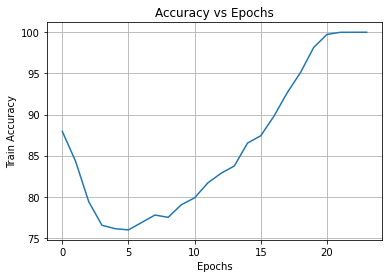

In [56]:
view.show_graph(list(range(len(train_accuracy))), train_accuracy, "Epochs", "Train Accuracy", "Accuracy vs Epochs")

#### Validation Accuracy

In [0]:
network.validate(model=model, data_loader=test_loader, device=device)

Batch: 99, Test Accuracy: 87.63: 100%|██████████| 100/100 [00:02<00:00, 37.42it/s]


# Model Summary

In [104]:
model.summary(input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
            Conv2d-2          [-1, 128, 32, 32]          73,856
         MaxPool2d-3          [-1, 128, 16, 16]               0
       BatchNorm2d-4          [-1, 128, 16, 16]             256
              ReLU-5          [-1, 128, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]         147,584
       BatchNorm2d-7          [-1, 128, 16, 16]             256
              ReLU-8          [-1, 128, 16, 16]               0
            Conv2d-9          [-1, 128, 16, 16]         147,584
      BatchNorm2d-10          [-1, 128, 16, 16]             256
             ReLU-11          [-1, 128, 16, 16]               0
         ResBlock-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         295,168
        MaxPool2d-14            [-1, 25

# Tried Extra with Multiple Epochs

In [0]:
one_cycle_policy = OneCycleLR(sgd_optimizer, max_lr=1, pct_start=0.25 , steps_per_epoch=len(train_loader), div_factor=10, cycle_momentum=False, epochs=24)

In [96]:
train_accuracy = []
for epoch in range(24):
  print(f"EPOCH: {epoch}")
  accuracy = network.train(model=model, optimizer=sgd_optimizer, device=device, policy=one_cycle_policy, data_loader=train_loader, criterion=cross_entropy)
  train_accuracy.append(accuracy);

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 5


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 6


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 7


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 8


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 9


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 10


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 11


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 12


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 13


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 14


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 15


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 16


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 17


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 18


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 19


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 20


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 21


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 22


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 23


Batch: 97, loss: 0.06, Train Accuracy: 99.31: 100%|██████████| 98/98 [00:24<00:00,  4.02it/s]


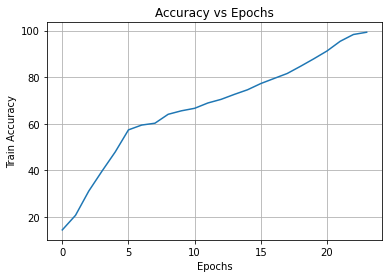

In [97]:
view.show_graph(list(range(len(train_accuracy))), train_accuracy, "Epochs", "Train Accuracy", "Accuracy vs Epochs")

#### Image Augmentation Training

In [0]:
torch.cuda.manual_seed(6)

model = nn.ResNet(block=nn.ResBlock).to(device)
sgd_optimizer = optimizer.SGD(params=model.parameters(), lr=0.02, momentum=0.9, weight_decay=1e-3)
cross_entropy = loss_fns.CrossEntropyLoss()

In [0]:
one_cycle_policy = OneCycleLR(sgd_optimizer, max_lr=1, pct_start=0.25 , steps_per_epoch=len(train_loader), div_factor=10, cycle_momentum=False, epochs=24)

In [101]:
train_accuracy = []
for epoch in range(24):
  print(f"EPOCH: {epoch}")
  accuracy = network.train(model=model, optimizer=sgd_optimizer, device=device, policy=one_cycle_policy, data_loader=train_aug_loader, criterion=cross_entropy)
  train_accuracy.append(accuracy);

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 5


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 6


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 7


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 8


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 9


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 10


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 11


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 12


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 13


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 14


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 15


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 16


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 17


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 18


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 19


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 20


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 21


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 22


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 23


Batch: 97, loss: 0.38, Train Accuracy: 86.98: 100%|██████████| 98/98 [00:32<00:00,  2.97it/s]


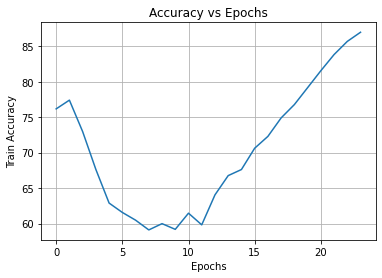

In [102]:
view.show_graph(list(range(len(train_accuracy))), train_accuracy, "Epochs", "Train Accuracy", "Accuracy vs Epochs")

#### Validation Accuracy

In [103]:
network.validate(model=model, data_loader=test_loader, device=device)

Batch: 99, Test Accuracy: 85.22: 100%|██████████| 100/100 [00:02<00:00, 36.81it/s]
